# Identify which events caused more errors

This notebook answers the following questions:

- [X] What is the ratio of UI_EVENT_SOURCE field error types to PAGE_CONTEXT?
- [X] What is the ratio of UI_EVENT_SOURCE field error types to PAGE_ENTITY_TYPE?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import HTML

### Aligning data visualizations

The following code is used to center and align the visualizations laid out below.

In [2]:
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""") 

### Loadind Data

In [3]:
source_path = "data/Salesforce/ELF/LightningError/2022-06-06_LightningError.csv"

lightning_error = pd.read_csv(source_path)

### Description of the fields under analysis

Below is the definition of the fields being analyzed in this task.

1. **UI_EVENT_SOURCE**: The source of the error event;
2. **PAGE_CONTEXT**: Context of the page where the event occurred;
3. **PAGE_ENTITY_TYPE**: The entity type of the event.


All definitions detailed above can be found in this [reference](https://developer.salesforce.com/docs/atlas.en-us.object_reference.meta/object_reference/sforce_api_objects_eventlogfile_lightningerror.htm).

## 1. What is the ratio of UI_EVENT_SOURCE field error types to PAGE_CONTEXT?

As we can see in the pie chart below, the Error and TypeError types are the dominant error types in relation to the PAGE_CONTEXT field. RangeError and AuraError appear in a much smaller percentage, and only 0.48% correspond to other types of errors.

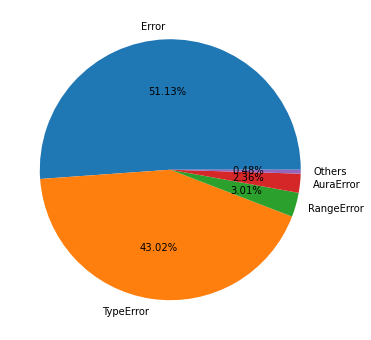

In [4]:
group_pg_context = lightning_error.groupby("UI_EVENT_SOURCE")['PAGE_CONTEXT']

group_count1 = group_pg_context.count()

num_rows1 = lightning_error.count()['PAGE_CONTEXT']

threshold_percent1 = 0.023

sum1 = group_count1[group_count1/num_rows1 < threshold_percent1].sum()

plt.show()
new_group_count1 = group_count1[group_count1/num_rows1 >= threshold_percent1]
new_group_count1['Others'] = sum1


plt.figure(figsize=(6,6))
plt.pie(new_group_count1.sort_values(ascending=False), autopct='%1.2f%%', 
        labels = ['Error','TypeError','RangeError','AuraError','Others'])

plt.show()

Below is a breakdown of the small fraction of errors characterized as "Others"

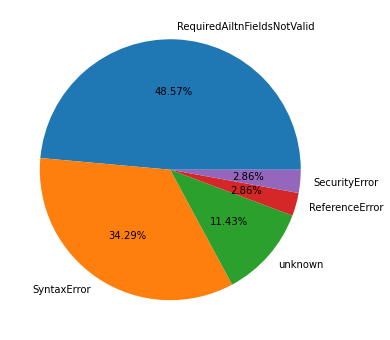

In [5]:
new_group_count1 = group_count1[group_count1/num_rows1 < threshold_percent1]

plt.figure(figsize=(6,6))
plt.pie(new_group_count1.sort_values(ascending=False), autopct='%1.2f%%', 
        labels = ['RequiredAiltnFieldsNotValid', 'SyntaxError', 'unknown', 'ReferenceError', 'SecurityError'])

plt.show()

## 2. What is the ratio of UI_EVENT_SOURCE field error types to PAGE_ENTITY_TYPE?

As can be seen in the pie chart below, in line with the previous topic, the predominant error types are Error and TypeError. RangeError appears in third place, and a small percentage of 0.51% corresponds to other types of errors.

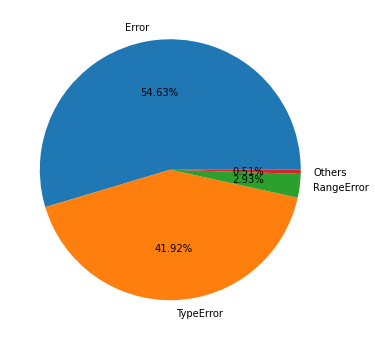

In [6]:
group_pg_entity_type = lightning_error.groupby("UI_EVENT_SOURCE")['PAGE_ENTITY_TYPE']

group_count2 = group_pg_entity_type.count() 

num_rows2 = lightning_error.count()['PAGE_ENTITY_TYPE']

threshold_percent2 = 0.0293

sum2 = group_count2[group_count2/num_rows2 < threshold_percent2].sum()


new_group_count2 = group_count2[group_count2/num_rows2 >= threshold_percent2]
new_group_count2['Others'] = sum2
 
plt.figure(figsize=(6,6))
plt.pie(new_group_count2.sort_values(ascending=False), autopct='%1.2f%%', 
        labels = ['Error','TypeError','RangeError','Others'])

plt.show()

Below is a breakdown of the small fraction of errors characterized as "Others"

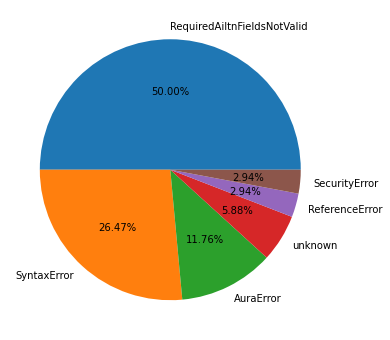

In [7]:
new_group_count2 = group_count2[group_count2/num_rows2 < 0.029]

plt.figure(figsize=(6,6))
plt.pie(new_group_count2.sort_values(ascending=False), autopct='%1.2f%%', 
        labels = ['RequiredAiltnFieldsNotValid', 'SyntaxError', 'AuraError', 'unknown', 'ReferenceError', 'SecurityError'])

plt.show()